1: Import Libraries

In [88]:
# Import necessary libraries for data manipulation, visualization, and neural networks
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Set a random seed for reproducibility
tf.random.set_seed(3)


2: Load and Explore the MNIST Dataset

Shapes of X_train: (60000, 28, 28), Y_train: (60000,), X_test: (10000, 28, 28), Y_test: (10000,)


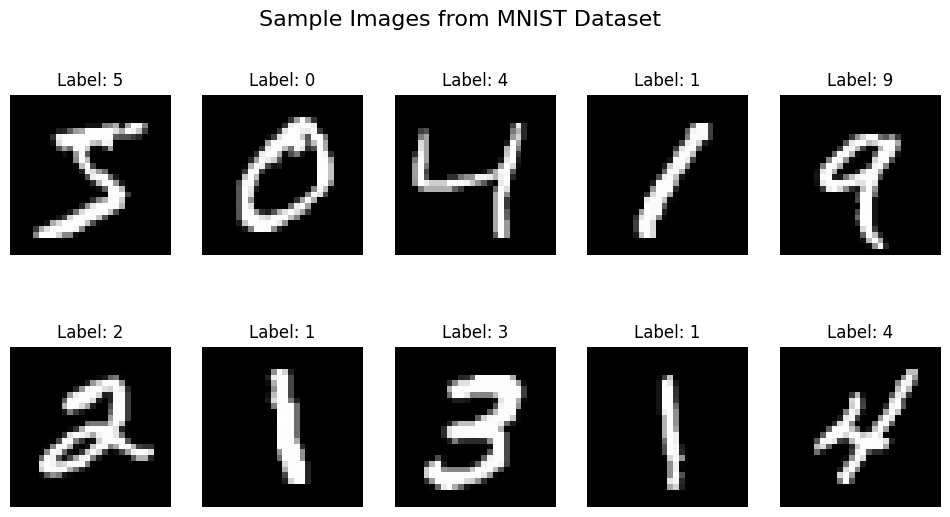

In [ ]:
# Load the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Print the shapes of the datasets
print(f"Shapes of X_train: {X_train.shape}, Y_train: {Y_train.shape}, X_test: {X_test.shape}, Y_test: {Y_test.shape}")

# Display some sample images from the training dataset
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {Y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16)
plt.show()


3: Exploratory Data Analysis (EDA)

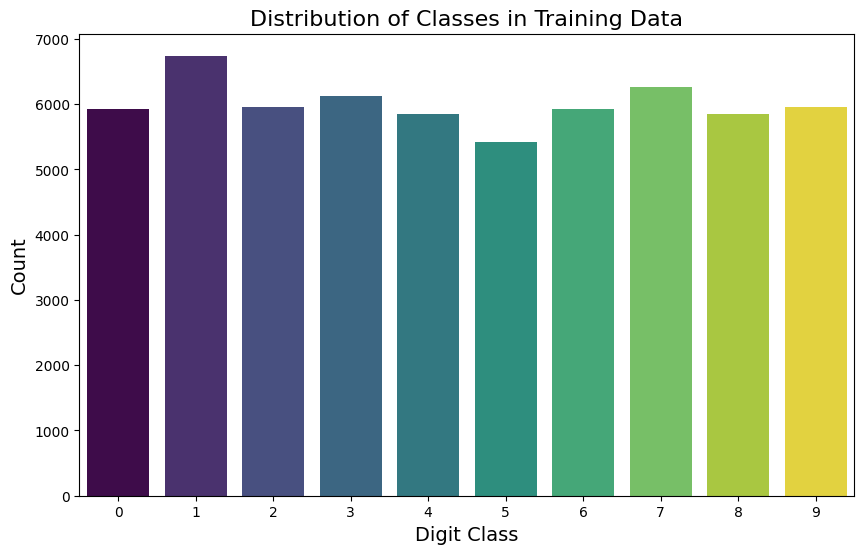

Mean pixel value in the training data: 0.13
Standard deviation of pixel values in the training data: 0.31


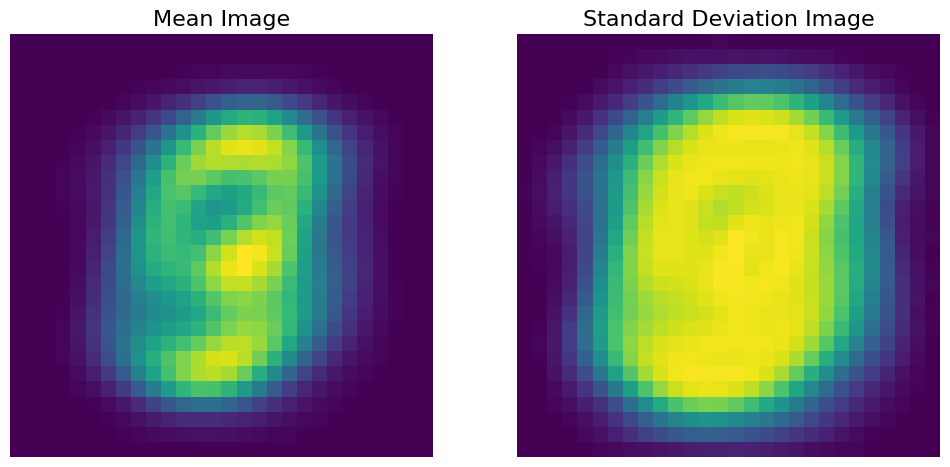

In [105]:
# Distribution of classes in the training data
plt.figure(figsize=(10, 6))
sns.countplot(x=Y_train, hue=Y_train, palette='viridis', legend=False)
plt.title("Distribution of Classes in Training Data", fontsize=16)
plt.xlabel("Digit Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

# Mean and standard deviation of the pixel values in the training dataset
mean_pixel_value = np.mean(X_train)
std_pixel_value = np.std(X_train)

print(f"Mean pixel value in the training data: {mean_pixel_value:.2f}")
print(f"Standard deviation of pixel values in the training data: {std_pixel_value:.2f}")

# Compute the mean and standard deviation images
mean_image = np.mean(X_train, axis=0)
std_image = np.std(X_train, axis=0)

# Display the mean and standard deviation images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(mean_image, cmap='viridis')
plt.title("Mean Image", fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(std_image, cmap='viridis')
plt.title("Standard Deviation Image", fontsize=16)
plt.axis('off')

plt.show()


4: Data Normalization and Augmentation

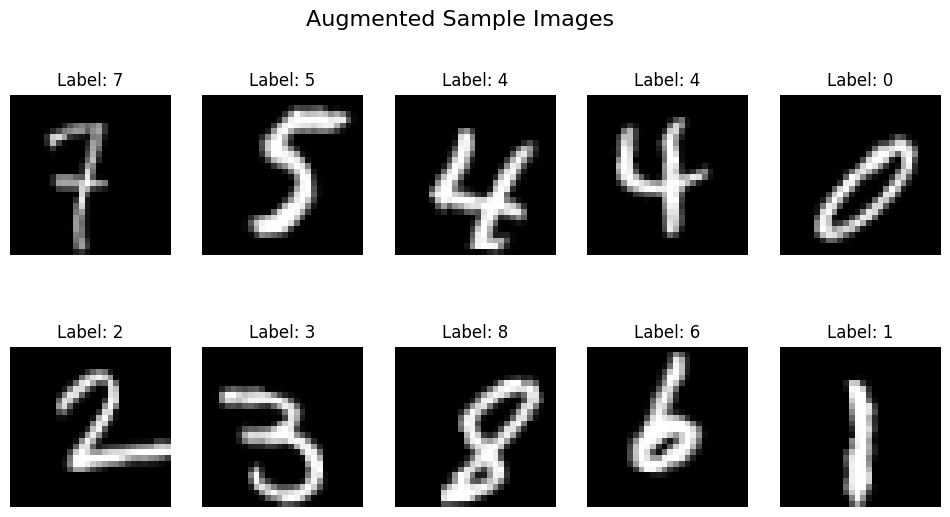

In [ ]:
# Normalize the dataset to the range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Expand dimensions to match Conv2D input requirements
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1
)
datagen.fit(X_train)

# Display some augmented sample images
plt.figure(figsize=(12, 6))
for X_batch, y_batch in datagen.flow(X_train, Y_train, batch_size=10):
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y_batch[i]}")
        plt.axis('off')
    plt.suptitle("Augmented Sample Images", fontsize=16)
    plt.show()
    break


5: Build and Compile an Advanced Neural Networ

In [89]:
# Define an advanced neural network model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with learning rate scheduler
initial_lr = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_lr, decay_steps=100000, decay_rate=0.96, staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


6: Callbacks

In [ ]:
# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

callbacks = [checkpoint, early_stopping, reduce_lr]

7: Train the Neural Network with Data Augmentation

In [ ]:
# Train the neural network model with data augmentation
history = model.fit(datagen.flow(X_train, Y_train, batch_size=64),
                    epochs=50, validation_data=(X_test, Y_test), callbacks=callbacks)


Epoch 1/50
938/938 [==============================] - 128s 131ms/step - loss: 0.6732 - accuracy: 0.7901 - val_loss: 0.0996 - val_accuracy: 0.9667 - lr: 0.0010
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


938/938 [==============================] - 109s 116ms/step - loss: 0.2719 - accuracy: 0.9136 - val_loss: 0.0653 - val_accuracy: 0.9791 - lr: 0.0010
Epoch 3/50
938/938 [==============================] - 105s 112ms/step - loss: 0.2140 - accuracy: 0.9327 - val_loss: 0.0559 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 4/50
938/938 [==============================] - 103s 110ms/step - loss: 0.1917 - accuracy: 0.9410 - val_loss: 0.0474 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 5/50
938/938 [==============================] - 105s 112ms/step - loss: 0.1676 - accuracy: 0.9479 - val_loss: 0.0529 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 6/50
938/938 [==============================] - 104s 111ms/step - loss: 0.1591 - accuracy: 0.9510 - val_loss: 0.0762 - val_accuracy: 0.9702 - lr: 0.0010
Epoch 7/50
938/938 [==============================] - 106s 113ms/step - loss: 0.1463 - accuracy: 0.9548 - val_loss: 0.0548 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 8/50
938/938 [==============================] - 104

8: Visualize Training History

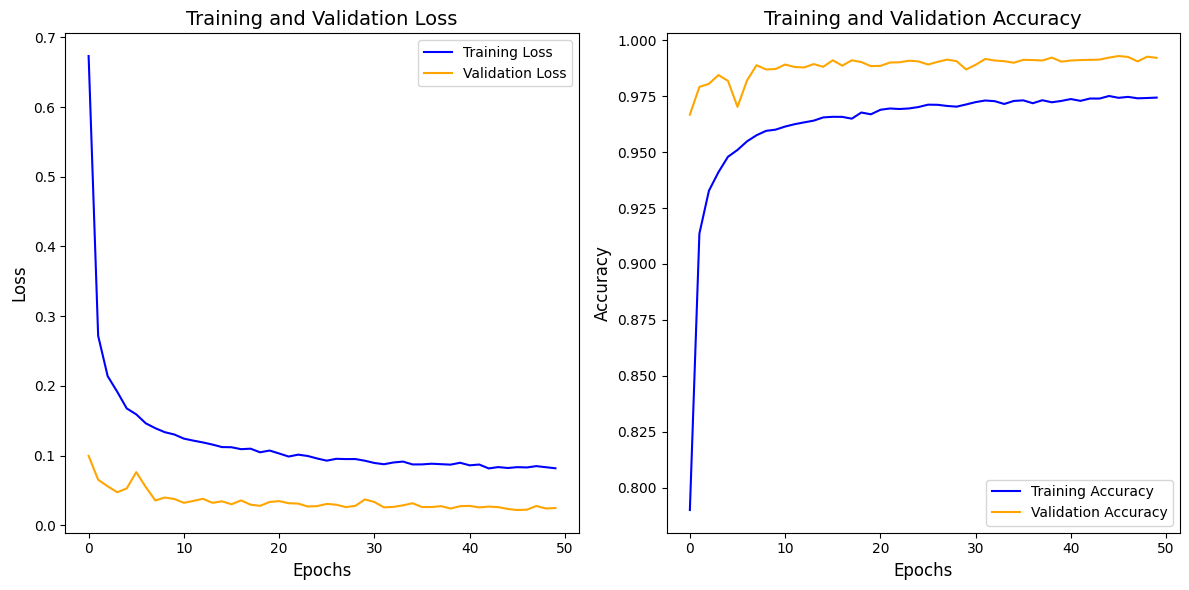

In [ ]:
# Visualize training and validation loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14)
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


9: Classification Report

In [92]:
# Make predictions on the test dataset
Y_pred = model.predict(X_test)

# Convert prediction probabilities to class labels
Y_pred_labels = [np.argmax(i) for i in Y_pred]

# Compute the confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

# Print classification report with zero_division parameter
print("Classification Report\n", classification_report(Y_test, Y_pred_labels, zero_division=1))


313/313 [==============================] - 9s 28ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       1.00      0.00      0.00      1032
           3       0.19      0.00      0.01      1010
           4       1.00      0.00      0.00       982
           5       1.00      0.00      0.00       892
           6       1.00      0.00      0.00       958
           7       0.10      0.99      0.19      1028
           8       1.00      0.00      0.00       974
           9       1.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.63      0.10      0.02     10000
weighted avg       0.61      0.10      0.02     10000



10: Precision,Recall,Accuracy & F1 Score

In [77]:
# Compute precision, recall, accuracy, and F1 score
precision = precision_score(Y_test, Y_pred_labels, average='weighted')
recall = recall_score(Y_test, Y_pred_labels, average='weighted')
accuracy = accuracy_score(Y_test, Y_pred_labels)
f1 = f1_score(Y_test, Y_pred_labels, average='weighted')

print("Step 10: Evaluation Metrics")
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("Accuracy: {:.4f}".format(accuracy))
print("F1 Score: {:.4f}".format(f1))


Step 10: Evaluation Metrics
Precision: 0.9921
Recall: 0.9921
Accuracy: 0.9921
F1 Score: 0.9921


11: Visualization Of Metrics

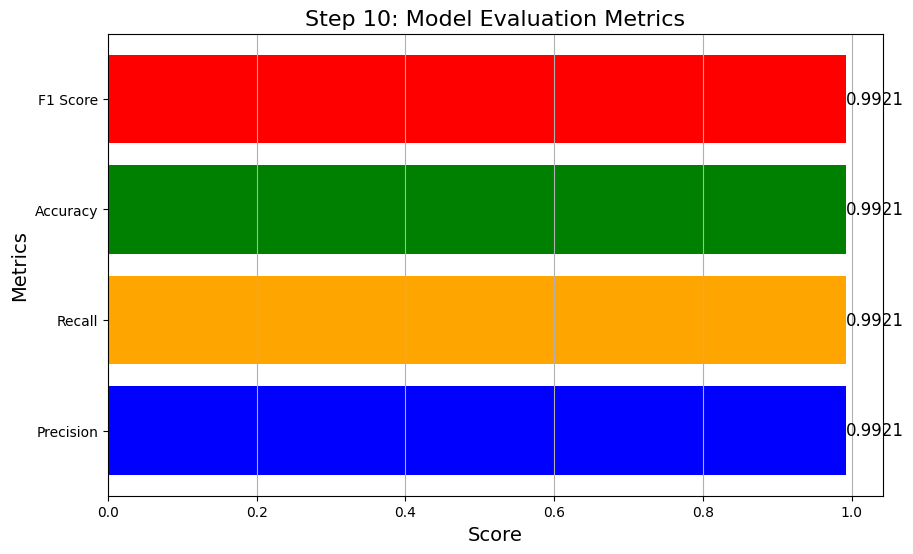

In [81]:
# Step 10: Visualize precision, recall, accuracy, and F1 score
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 Score']
values = [precision, recall, accuracy, f1]

plt.figure(figsize=(10, 6))
bars = plt.barh(metrics, values, color=['blue', 'orange', 'green', 'red'])

# Add annotations
for bar, value in zip(bars, values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, '{:.4f}'.format(value),
             va='center', ha='left', fontsize=12, color='black')

plt.xlabel('Score', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.title('Step 10: Model Evaluation Metrics', fontsize=16)
plt.grid(axis='x')
plt.show()


12: Visulization Of Confusion Matrix

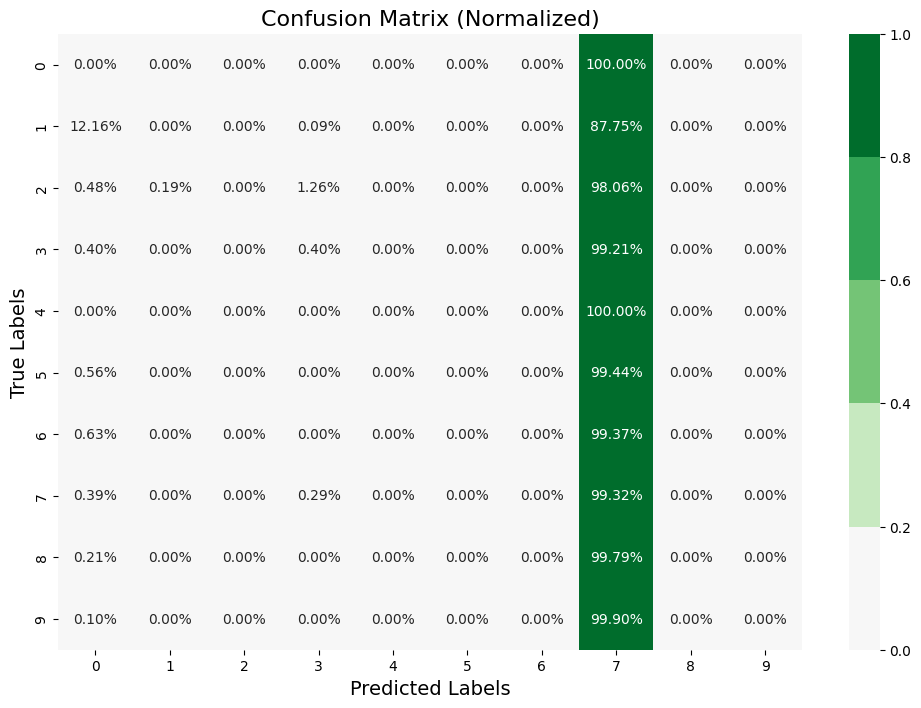

In [106]:
# Ensure that conf_mat is a TensorFlow tensor with dtype=tf.float32
conf_mat = tf.cast(conf_mat, tf.float32)

# Compute confusion matrix percentages
conf_mat_percent = conf_mat / tf.reduce_sum(conf_mat, axis=1, keepdims=True)

# Step 10: Confusion Matrix visualization
plt.figure(figsize=(12, 8))

# Define custom colormap
cmap = mcolors.ListedColormap(['#f7f7f7', '#c7e9c0', '#74c476', '#31a354', '#006d2c'])

heatmap = sns.heatmap(conf_mat_percent, annot=True, fmt='.2%', cmap=cmap,
                      xticklabels=range(10), yticklabels=range(10))

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.title('Confusion Matrix (Normalized)', fontsize=16)

# Remove color bar legend
# cb = heatmap.figure.colorbar(heatmap.collections[0])

plt.show()


13: Predict an External Image

Path of the image to be predicted: /content/MNIST_digit.png


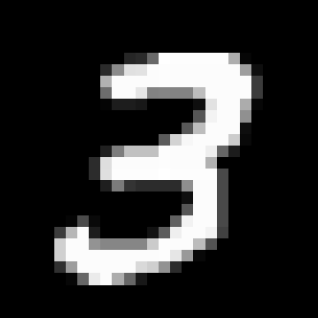

1/1 [==============================] - 0s 24ms/step
The Handwritten Digit is recognized as 3


In [86]:
def predict_image(image_path):
    # Load and preprocess the image
    input_image = cv2.imread(image_path)
    cv2_imshow(input_image)
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
    input_image_resize = cv2.resize(grayscale, (28, 28))
    input_image_resize = input_image_resize / 255.0
    image_reshaped = np.reshape(input_image_resize, [1, 28, 28, 1])

    # Make prediction
    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    # Display the prediction
    print(f'The Handwritten Digit is recognized as {input_pred_label}')

# Interactive user input for image path
input_image_path = input('Path of the image to be predicted: ')
predict_image(input_image_path)
